# 4.2 Parabolic PDE

In [1]:
from IPython.display import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## 4.2.1 FTCS Method
In **Forward Time Central Space** method, we take forward difference and central difference method for time and space derivatives respectively.

### Instability in FCTS method

In [3]:
from Ch4_2_functions import parbPDE_FTCS
print(parbPDE_FTCS.__doc__)


    Function: parbPDE_FTCS(U0, D, hx, ht)
        ARGUMENTS
    U0: list of solution at previous time step
    D: Constant in PDE
    hx, ht: Steps in x and t
        RETURNS
    U: list of solution in current time step
    


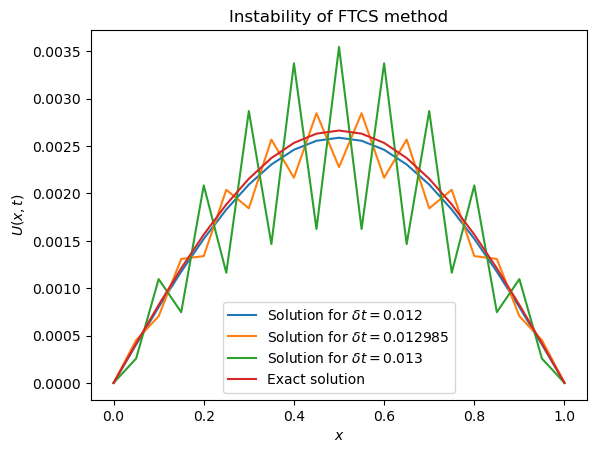

In [4]:
D = 0.1
L = 1
Nx = 20
Tmx = 6
hts = [1.2e-2, 1.2985e-2, 1.3e-2]
hx = L/Nx
x = [i*hx for i in range(Nx+1)]
for ht in hts:
    lmb = D*ht/hx**2
    t = 0
    U0 = [np.sin(np.pi*x[i]/L) for i in range(Nx+1)]  # initial soln
    while t<Tmx:
        t = t+ht
        U = parbPDE_FTCS(U0, D, hx, ht)
        U0 = [U[i] for i in range(Nx+1)] # updating U for a later time
    plt.plot(x, U, label=f'Solution for $\delta t=${ht}')
fex = np.exp(-np.pi**2*D*t/L**2)
Uexact = [fex*np.sin(np.pi*x[i]/L) for i in range(Nx+1)]
plt.plot(x, Uexact, label='Exact solution')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$U(x,t)$')
plt.title('Instability of FTCS method')
plt.show()

In [5]:
def exact_soln(x, t):
    return np.exp(-np.pi**2*t/4) * np.sin(np.pi*x/2)
D = 1


# STABILITY CRITERIA IN FTCS METHOD

## 4.2.2 BTCS Method
In **Backward Time Central Space** method, we take backward difference and central difference method for time and space derivatives respectively.

In [6]:
from Ch4_2_functions import parbPDE_BTCS
print(parbPDE_BTCS.__doc__)


    Function: parbPDE_BTCS(U0, D, hx, ht)
        ARGUMENTS
    U0: list of solution at previous time step
    D: Constant in PDE
    hx, ht: Steps in x and t
        RETURNS
    U: list of solution in current time step
    


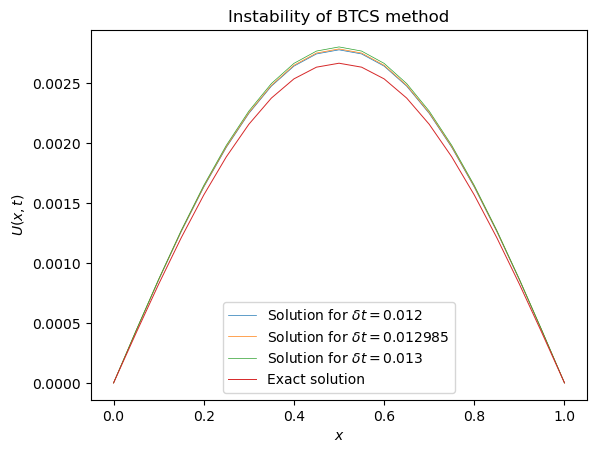

In [7]:
D = 0.1
L = 1
Nx = 20
Tmx = 6
hts = [1.2e-2, 1.2985e-2, 1.3e-2]
hx = L/Nx
x = [i*hx for i in range(Nx+1)]
for ht in hts:
    lmb = D*ht/hx**2
    t = 0
    U0 = [np.sin(np.pi*x[i]/L) for i in range(Nx+1)]  # initial soln
    while t<Tmx:
        t = t+ht
        U = parbPDE_BTCS(U0, D, hx, ht)
        U0 = [U[i] for i in range(Nx+1)] # updating U for a later time
    plt.plot(x, U, label=f'Solution for $\delta t=${ht}', lw=0.5)
fex = np.exp(-np.pi**2*D*t/L**2)
Uexact = [fex*np.sin(np.pi*x[i]/L) for i in range(Nx+1)]
plt.plot(x, Uexact, label='Exact solution', lw=0.7)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$U(x,t)$')
plt.title('Instability of BTCS method')
plt.show()

In [8]:
# ANOTHER EXAMPLE

## 4.2.3 Crank-Nicolson Scheme (CTCS)
It is also named **Central Time Central Space (CTCS)** method.

In [9]:
from Ch4_2_functions import parbPDE_CrNc, parbPDE_CrNc1
print(parbPDE_CrNc.__doc__)


    Function: parbPDE_CrNc(U0, D, hx, ht)
        ARGUMENTS
    U0: list of solution at previous time step
    D: Constant in PDE
    hx, ht: Steps in x and t
        RETURNS
    U: list of solution in current time step
    


### Example
Diffusion equation with, $D=\dfrac{4}{\pi^2}$. The initial solution is given by,
$$ g(x) = \sin(\frac{\pi x}{4})\,\left[1+2\cos(\frac{\pi x}{4}) \right] $$

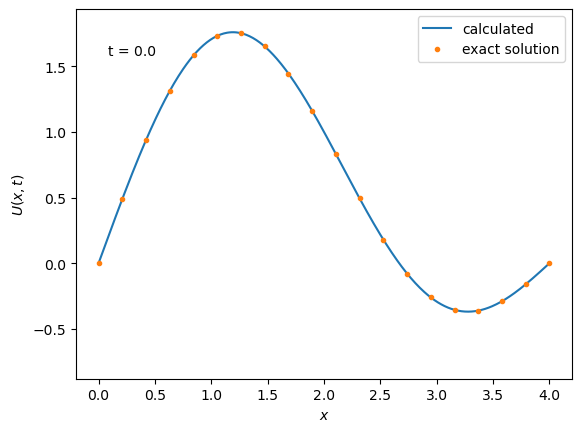

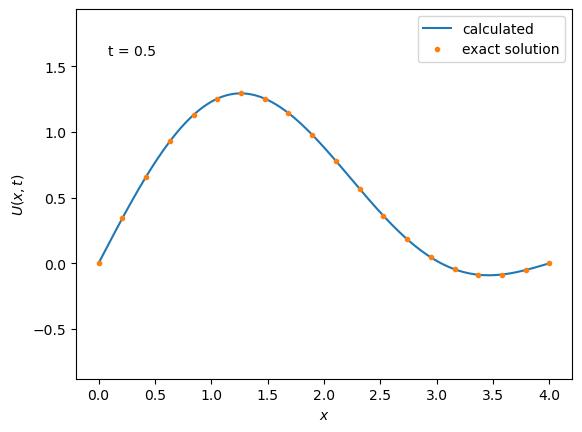

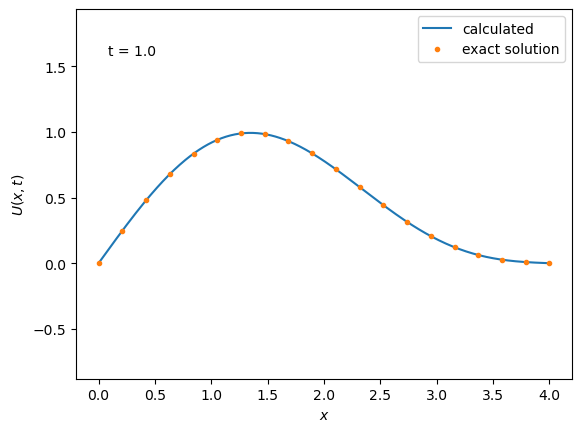

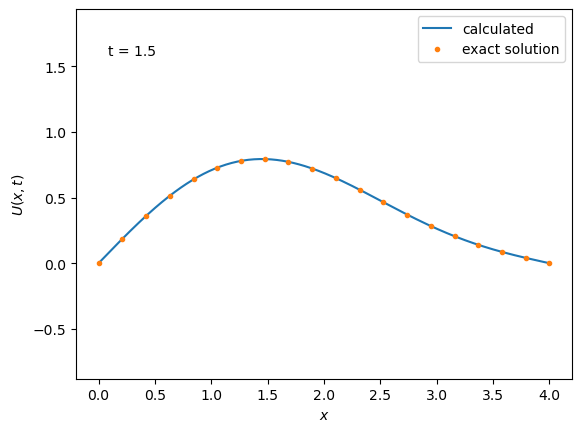

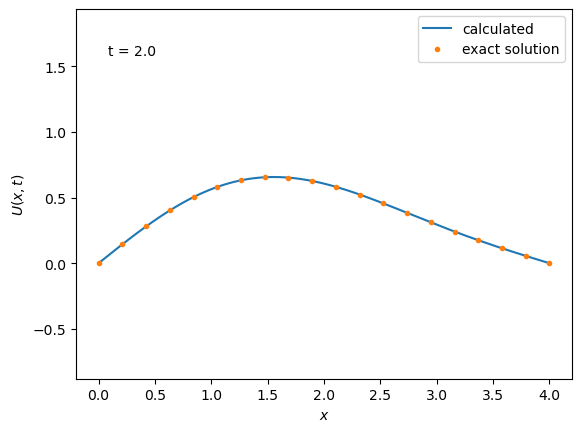

<Figure size 640x480 with 0 Axes>

In [10]:
def exact_soln(x, t):
    return np.exp(-t)*np.sin(np.pi*x/2) + np.exp(-t/4)*np.sin(np.pi*x/4)
D = 4/np.pi**2
Xmn, Xmx = 0, 4
hx, ht = 1e-2, 1e-2
tmx = 2
idt = 50    # time shown in graph
Nx, Nt = int((Xmx-Xmn)/hx), int(tmx/ht)
x = [Xmn +i*hx for i in range(Nx+1)]
U = [np.sin(np.pi*xi/4)*(1+2*np.cos(np.pi*xi/4)) for xi in x] # initial
Ymx = max(U)
for ti in range(Nt+1):
    if ti % idt ==0:
        t = ti*ht
        plt.plot(x, U, label='calculated')
        x1 = np.linspace(min(x), max(x), 20)
        plt.plot(x1, [exact_soln(xi,t) for xi in x1], 'o', ms=3, label='exact solution')
        plt.legend()
        plt.text(0.02*Xmx,0.9*Ymx, f't = {t}')
        plt.ylim(-Ymx/2, Ymx*1.1)
        plt.xlabel('$x$')
        plt.ylabel('$U(x,t)$')
        plt.pause(0.03)
        plt.clf()
    U = parbPDE_CrNc1(U, D, hx, ht)
plt.show()

## 4.2.4 TDSE
The **Time Dependent Schrodinger Equation** can be solved by the above 3 methods (FTCS, BTCS and CTCS).

### TDSE by FTCS method

In [11]:
from Ch4_2_functions import TDSE_FTCS
print(TDSE_FTCS.__doc__)


        ARGUMENTS
    pr: parameters [hbar, m]
    wvpk_fn: function for initial wave packet wvpk_fn(prWv, Nx)
    prWv: parameters for wvpk_fn
    pot_fn: function for potential pot_fn(prPt, x)
    prPt: parameters for pot_fn
    x0, xN: min and max value of x
    Nx: total no. of points in x
    ts: No. of iterations interval for real time plot
    tmx: max (final) time
    tps: Pause time plt.pause(tps)
        RETURNS
    None
    (Wave function plot)
    


#### Evolution of Gaussian Wavepacket

Initial solution:
$$ \phi(x,0) = \frac{1}{(2\pi\sigma^2)^{1/4}} \,\exp\left(-\frac{(x-x_0)^2}{4\sigma^2} + ik_0x \right) $$

In [12]:
def Gaussian_wvpk(pr, x):
    x0g, k0, sig = pr
    psi01 = (1/(2*np.pi*sig**2)**0.25)*np.exp(-(x-x0g)**2/(4*sig**2))
    if psi01 <= 1e-10:
        psi01 = 0
    psi0 = psi01*complex(np.cos(k0*x), np.sin(k0*x))
    return psi0

#### Free particle

In [13]:
# def pot_fn(pr, Nx):
#     return [0 for i in range(Nx)]

# hbar, m = 1, 1 # INPUT
# ts, tmx, tps = 100, 1276, 0.01
# x0, xN, Nx = 0, 799, 800
# k0, sig = np.pi/20, 20
# x0g = round(xN/2) - 12*sig
# pr, prPt, prWv = [hbar, m], None, [x0g, k0, sig]
# TDSE_FTCS(pr, Gaussian_wvpk, prWv, pot_fn, prPt, x0, xN, Nx, ts, tmx, tps)

#### Potential barrier

In [14]:
# def pot_fn(pr, Nx):
#     V0, thk = pr
#     V = [0 for i in range(Nx)]
#     V[int(Nx/2):int(Nx/2)+thk] = [V0 for i in range(thk)]
#     return V

# hbar, m = 1, 1
# ts, T, tps = 50, 5000, 0.01
# x0, xN, Nx = 0, 799, 800
# k0, sig = np.pi/20, 20
# x0g = round(xN/2) - 12*sig
# pr = [hbar, m]
# prWv = [x0, sig, k0]
# V0, thk = 1e-2, 25
# prPt = [V0, thk]
# TDSE_FTCS(pr, Gaussian_wvpk, prWv, pot_fn, prPt, x0, xN, Nx, ts, T, tps)

### TDSE by Crank-Nicolson method

In [15]:
from Ch4_2_functions import propTDSE_CrNc, psiNormRI1, TDSE_CrNc
print(propTDSE_CrNc.__doc__, psiNormRI1.__doc__, TDSE_CrNc.__doc__)


        ARGUMENTS
    pr: [hbar, m]
    psiR: real part of wavefunction
    psiI: imaginary part of wavefunction
    V: Potential
    dx, dt:
    mxItr, tol:
        RETURNS
    psiR: real part of wavefunction
    psiI: imaginary part of wavefunction
     
        ARGUMENTS
    psiR: list of real psi values
    psiI: list of imaginary psi values
    dx: step in x
        RETURNS
    psiR: normalized
    psiI: normalized
     
        ARGUMENTS
    pr: parameters [hbar, m]
    wvpk: function for initial wave packet wvpk_fn(prWv, Nx)
    prwv: parameters for wvpk_fn
    pot: function for potential pot_fn(prPt, x)
    prpt: parameters for pot_fn
    x0, xN: min and max value of x
    Nx: total no. of points in x
    ts: No. of iterations interval for real time plot
    tmx: max (final) time
    tps: Pause time plt.pause(tps)
        RETURNS
    None
    (Wave function plot)
    


In [16]:
def gausswv(pr, x):
    x1, sig, k0 = pr
    a = 1/((2*np.pi)**0.5 *sig)**0.5
    b = -1/(4*sig**2)
    gswv = a*np.exp(b*(x-x1)**2)
    if gswv < 1e-10:
        gswv = 0
    psi = gswv*complex(np.cos(k0*x), np.sin(k0*x))
    return psi

#### Free Particle

In [17]:
def pot(V0, Nx):
    V = [V0 for i in range(Nx)]
    return V

hbar, m = 1, 1
x0, xN, Nx = -20, 40, 200
sig = (xN-x0)/40
x1, k0 = x0 + 15*sig, np.pi
V0 = 7
pr = [hbar, m]
prwv = [x1, sig, k0]
ts, tmx, tps = 2, 5, 0.005
# TDSE_CrNc(pr, gausswv, prwv, pot, V0, x0, xN, Nx, ts, tmx, tps) # DONE

#### Double Barrier
$$ V (x) \quad= 0, \quad\quad 0\leq x < \frac{L}{2}-4h $$
$$ = V_0, \quad \frac{L}{2}-4h\leq x< \frac{L}{2}-3h $$
$$ = 0, \quad \frac{L}{2}-3h\leq x< \frac{L}{2}+3h $$
$$ = V_0, \quad \frac{L}{2}+3h\leq x< \frac{L}{2}+5h $$
$$ = 0, \quad \frac{L}{2}+5h\leq x\leq L $$

In [18]:
def pot(pr, Nx):
    V0, thk = pr
    V = [0 for i in range(Nx)]
    V[int(Nx/2)-4*thk:int(Nx/2)-3*thk] = [V0 for i in range(thk)]
    V[int(Nx/2)+3*thk:int(Nx/2)+5*thk] = [V0 for i in range(2*thk)]
    return V

hbar, m = 1, 1
x0, xN, Nx = -20, 40, 200
sig = (xN-x0)/40
x1, k0 = x0 + 5*sig, np.pi
V0, thk = 5, 10
pr = [hbar, m]
prwv = [x1, sig, k0]
prpt = [V0, thk]
ts, tmx, tps = 4, 40, 0.004
# TDSE_CrNc(pr, gausswv, prwv, pot, prpt, x0, xN, Nx, ts, tmx, tps) # DONE

#### Linear Potential
$$ V(x) \quad= 30 \,; \quad 0\leq x<\frac{L}{4}\\
= a(x-\frac{L}{4}) \,; \quad \frac{L}{4}\leq x\leq L $$

Energy of the particle = 0.012962005501361697, Scaled Energy = 4.576697887927141e-05


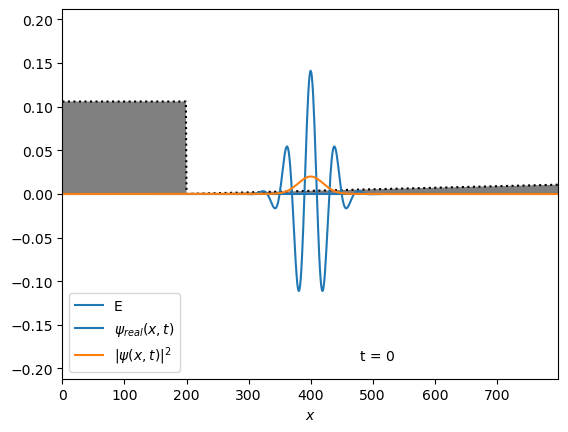

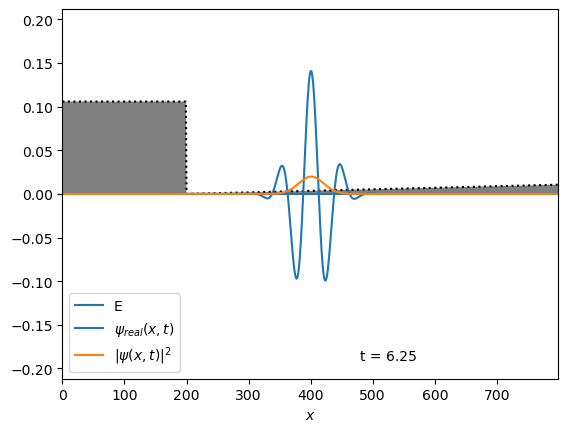

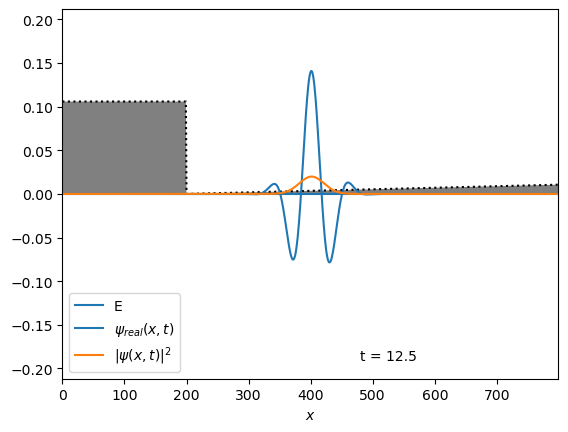

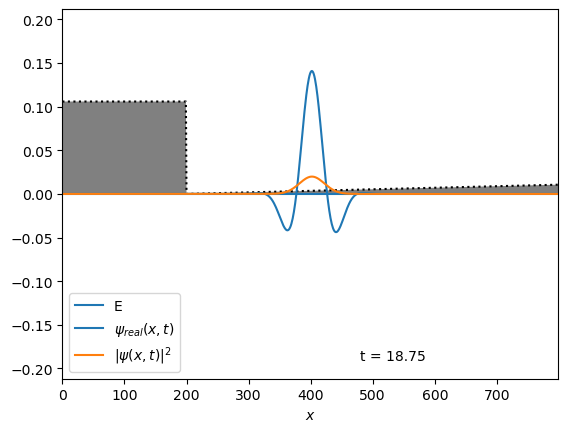

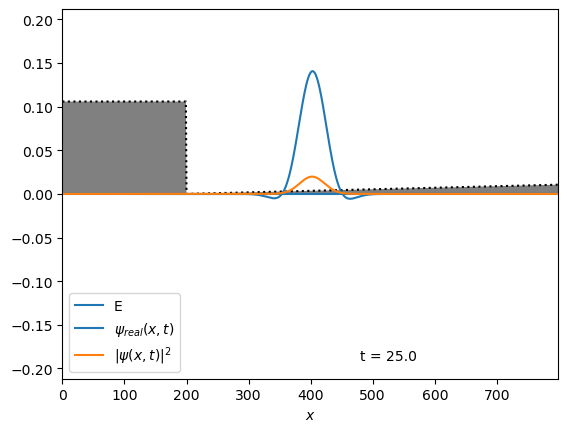

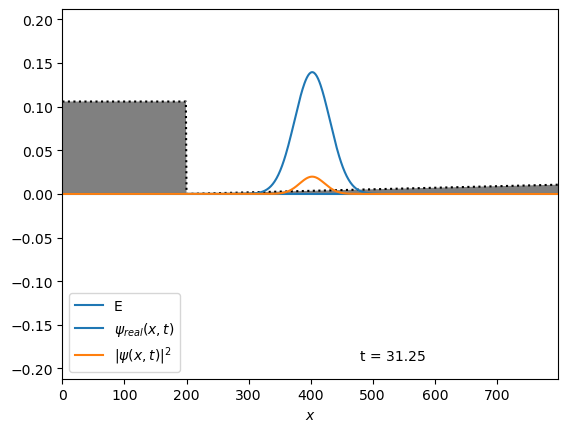

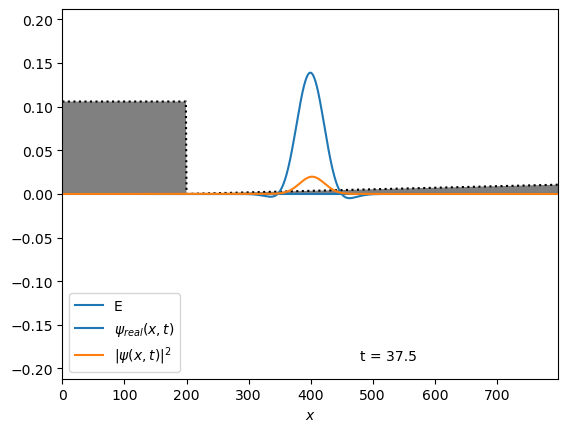

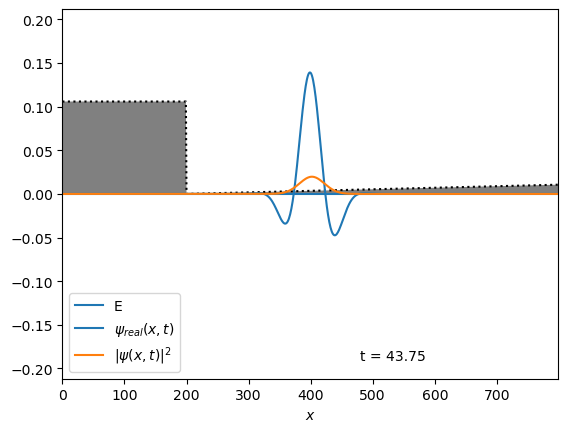

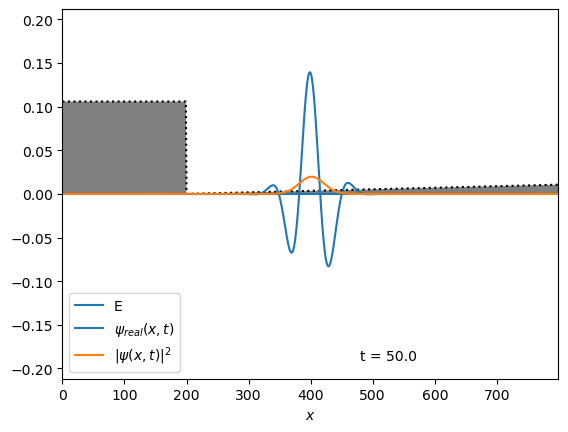

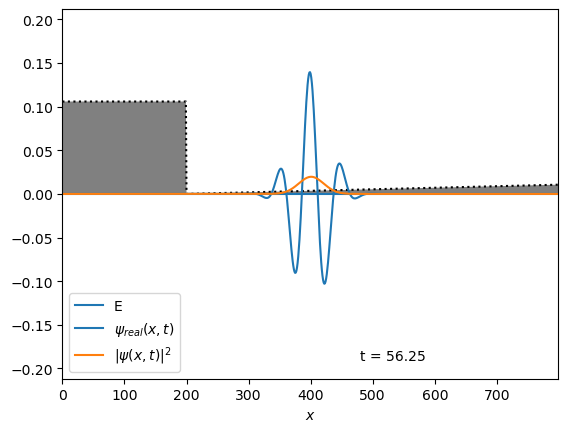

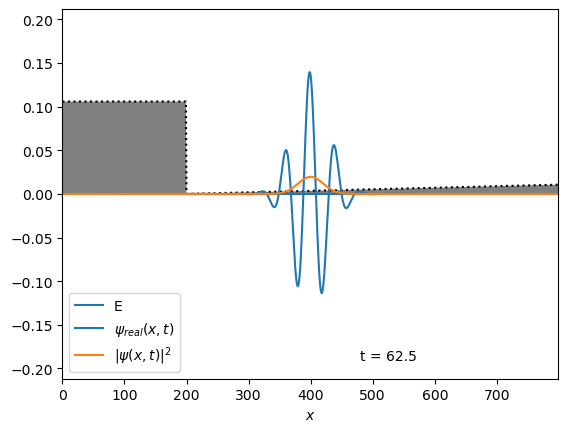

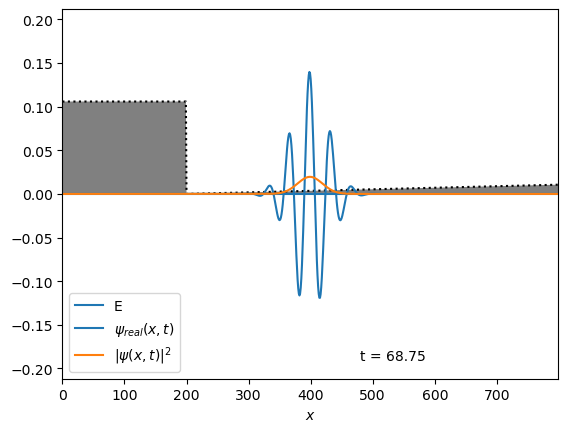

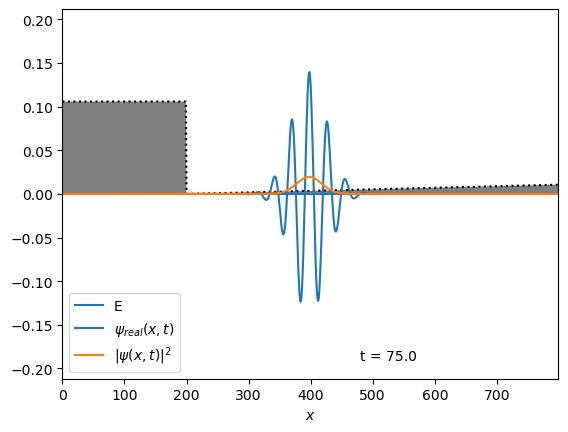

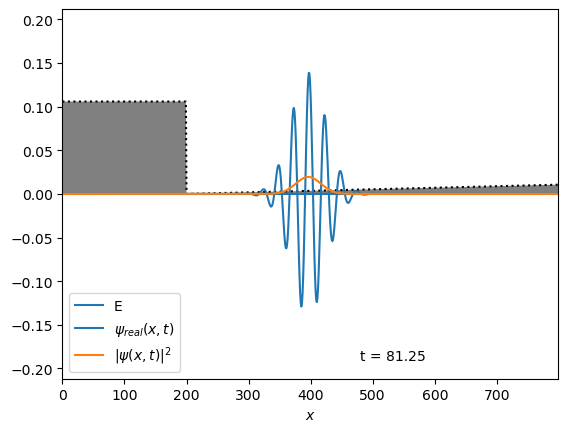

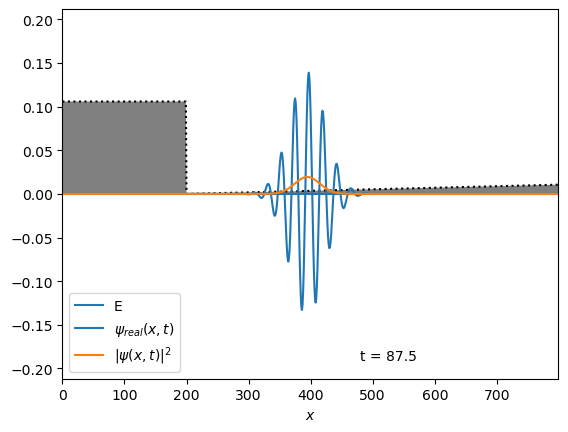

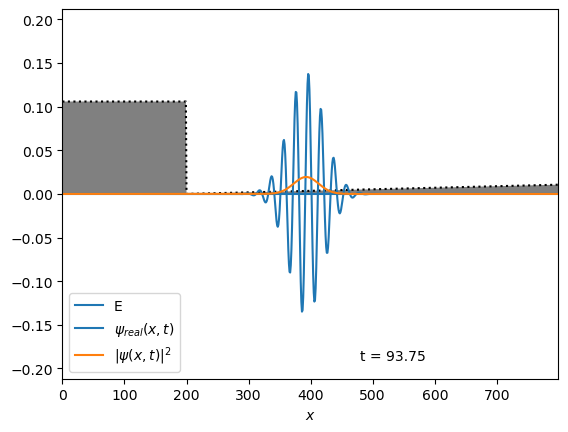

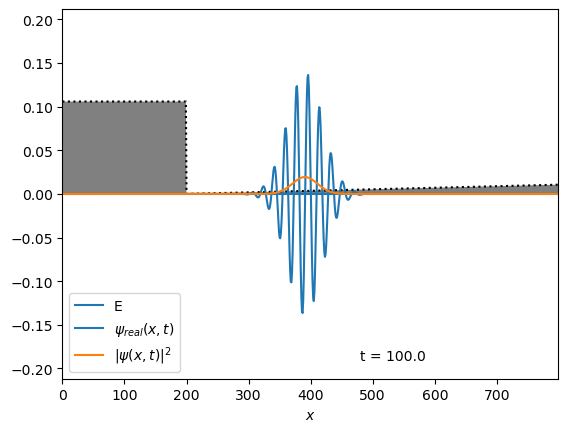

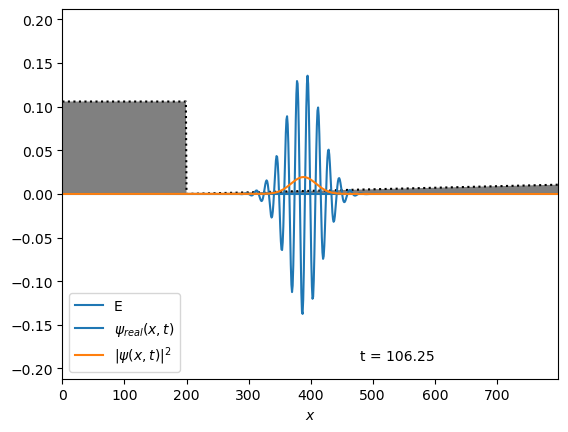

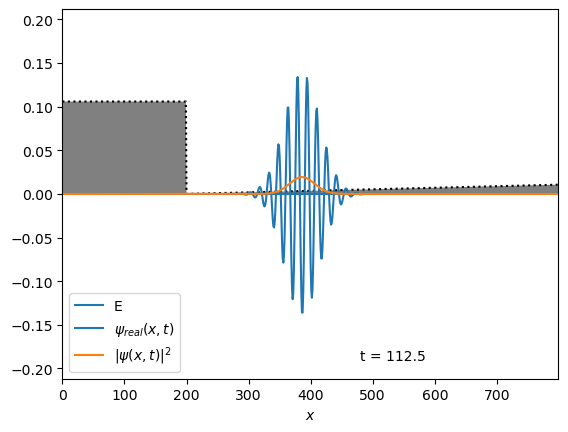

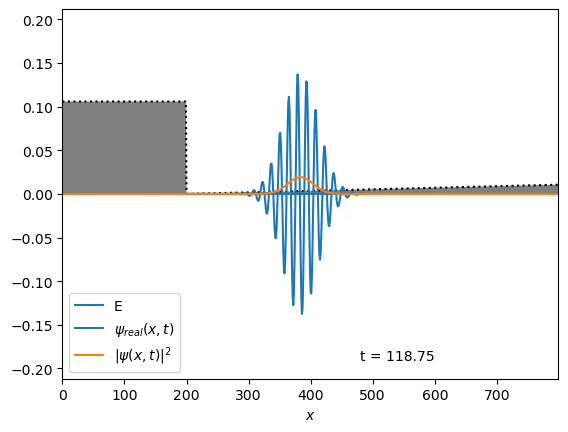

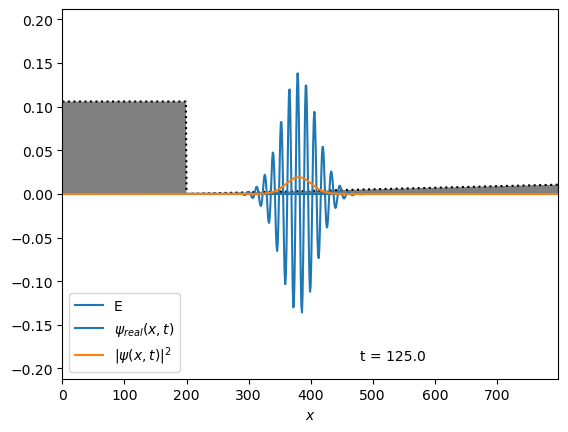

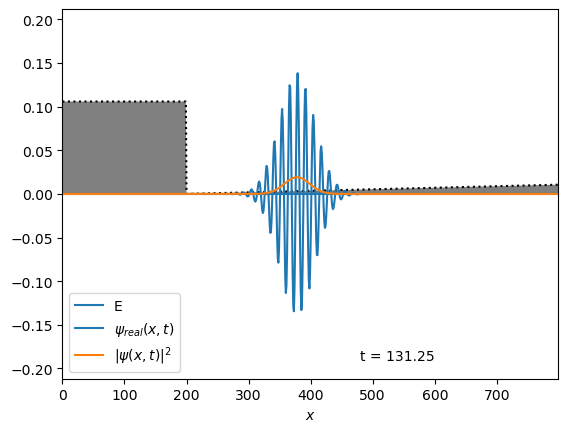

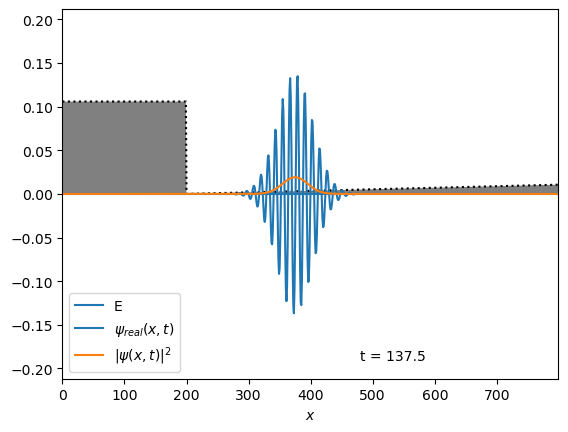

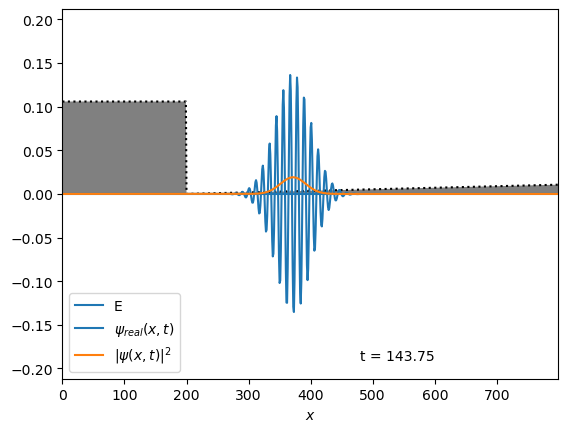

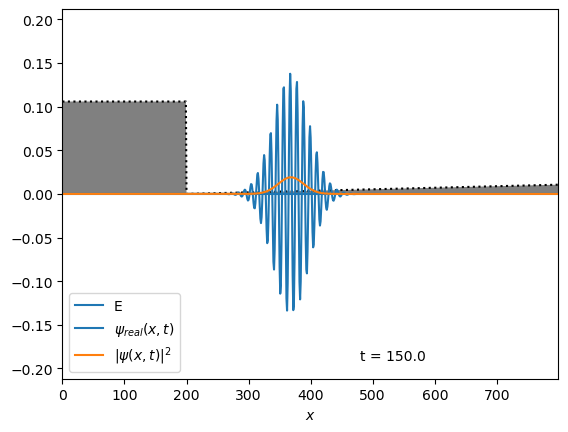

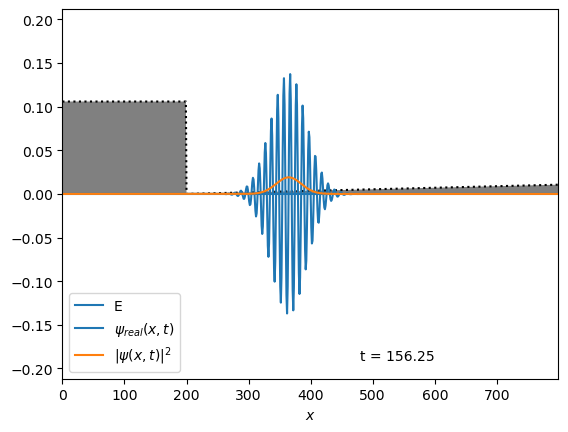

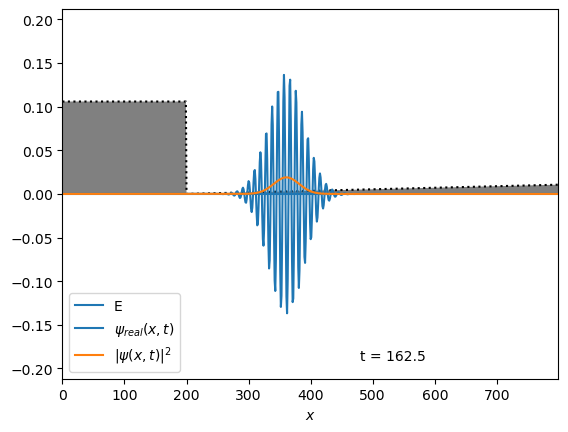

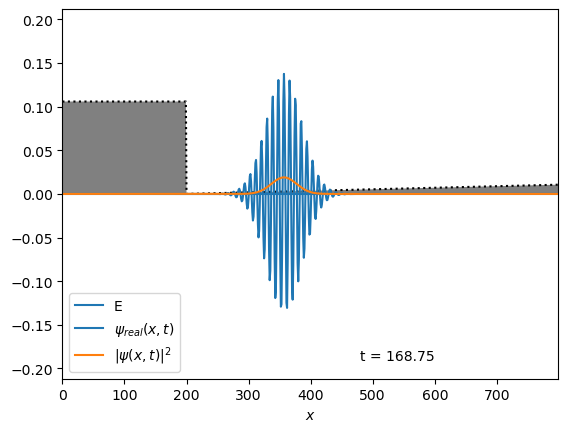

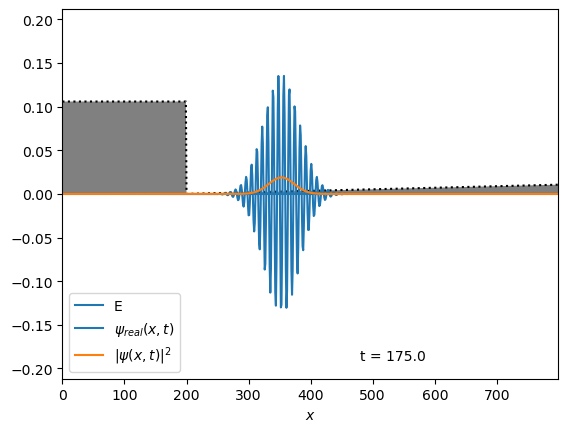

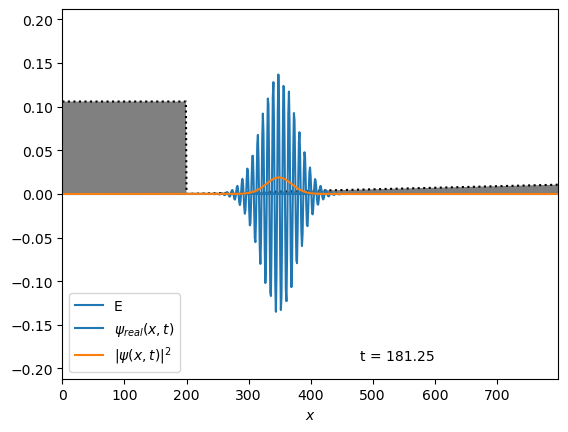

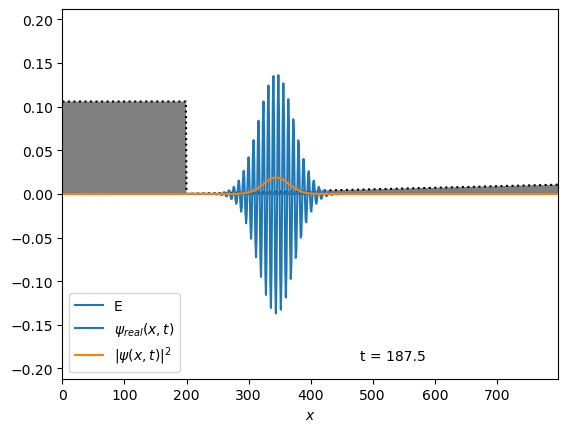

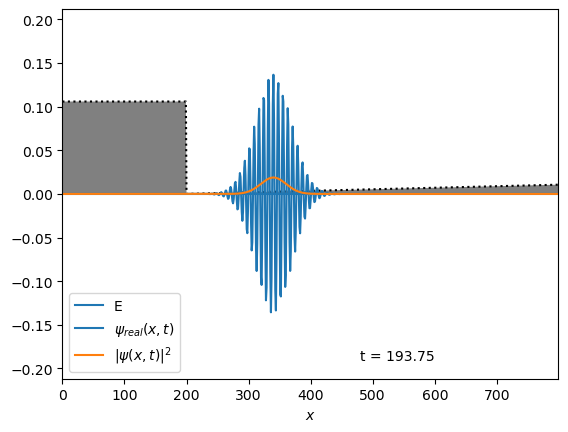

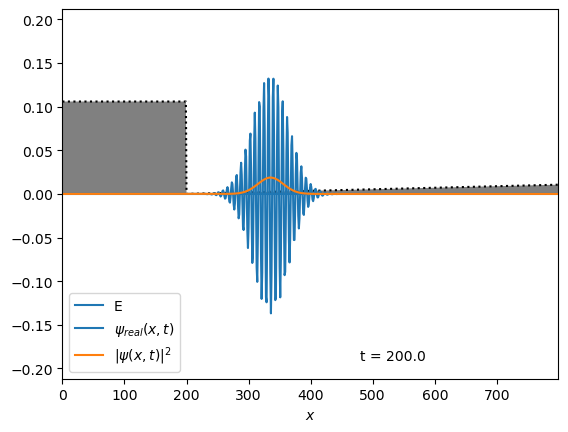

<Figure size 640x480 with 0 Axes>

In [19]:
def pot(a, Nx):
    V = [0 for i in range(Nx)]
    V[:int(Nx/4)] = [30 for i in range(int(Nx/4))]
    V[int(Nx/4)+1:] = [a*(i-int(Nx/4)+1) for i in range(int(Nx/4)+1, Nx)]
    return V

hbar, m = 1, 1
x0, xN, Nx = 0, 799, 800
sig = 20
x1, k0 = round(xN/2), np.pi/20
a = 5e-3
pr = [hbar, m]
prwv = [x1, sig, k0]
prpt = a
ts, tmx, tps = 100, 200, 0.04
TDSE_CrNc(pr, gausswv, prwv, pot, prpt, x0, xN, Nx, ts, tmx, tps) # DONE

#### Periodic Potential (model for crystal lattice in 1D)
$$ V(x) = V_0 \,; \quad \frac{L}{5}+(a+b)i \leq x < \frac{L}{5}+(a+b)i\,+b\,\,for\,i=0,1,2,...\\
= 0 \,; \quad otherwise $$

In [20]:
def pot(pr, Nx):
    V0, b = pr
    a, n1 = 4*b, int(Nx/5)
    V = [0 for i in range(Nx)]
    while True:
        V[n1:n1+int(b)] = [V0 for i in range(int(b))]
        n1 += a+b
        if n1 + int(b) > Nx:
            break
    return V

hbar, m = 1, 1
x0, xN, Nx = -20, 40, 200
sig = (xN-x0)/40
x1, k0 = x0 + 5*sig, np.pi
V0, b = 5, 8
pr = [hbar, m]
prwv = [x1, sig, k0]
prpt = [V0, b]
ts, tmx, tps = 4, 40, 0.04
# TDSE_CrNc(pr, gausswv, prwv, pot, prpt, x0, xN, Nx, ts, tmx, tps) # DONE

#### Potential Well
$$ V(x) = -V_0 \,;\quad \frac{L}{2}\leq x<\frac{L}{2}+h\\
= 0 \,; \quad otherwise $$

In [21]:
def pot(pr, Nx):
    V0, thk = pr
    V = [0 for i in range(Nx)]
    V[int(Nx/2):int(Nx/2)+thk] = [V0 for i in range(thk)]
    return V

hbar, m = 1, 1
x0, xN, Nx = -20, 40, 200
sig = (xN-x0)/40
x1, k0 = x0 + 5*sig, np.pi
V0, thk = -5, 10
pr = [hbar, m]
prwv = [x1, sig, k0]
prpt = [V0, thk]
ts, tmx, tps = 4, 40, 0.04
# TDSE_CrNc(pr, gausswv, prwv, pot, prpt, x0, xN, Nx, ts, tmx, tps) # DONE

#### Both Barrier and Well

In [22]:
def pot(pr, Nx):
    V0, thk = pr
    V = [0 for i in range(Nx)]
    V[int(Nx/2)-4*thk:int(Nx/2)-3*thk] = [V0 for i in range(thk)]
    V[int(Nx/2)-3*thk:int(Nx/2)+3*thk] = [V0/2 for i in range(6*thk)]
    V[int(Nx/2)+3*thk:int(Nx/2)+5*thk] = [V0 for i in range(2*thk)]
    return V

hbar, m = 1, 1
x0, xN, Nx = -20, 40, 200
sig = (xN-x0)/40
x1, k0 = x0 + 5*sig, np.pi
V0, thk = 5, 10
pr = [hbar, m]
prwv = [x1, sig, k0]
prpt = [V0, thk]
ts, tmx, tps = 4, 40, 0.04
# TDSE_CrNc(pr, gausswv, prwv, pot, prpt, x0, xN, Nx, ts, tmx, tps) # DONE

## Roughs

In [23]:
lst = [[0,2,1,1],[1,2,5,6]]
np.array(lst)[:,:-1]

array([[0, 2, 1],
       [1, 2, 5]])

In [24]:
ar1 = np.array([[1,2,4],[5,2,6],[1,6,3]])
ar2 = np.array([[1,5,5]])
np.concatenate((ar1,ar2.T), axis=1)

array([[1, 2, 4, 1],
       [5, 2, 6, 5],
       [1, 6, 3, 5]])

In [25]:
np.array([ar1@ar2[0]])

array([[31, 45, 46]])